In [94]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [95]:
df = pd.read_csv("boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [96]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [97]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [98]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [99]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [100]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
iqr = Q3 - Q1
lb = Q1 - iqr * 1.5
ub = Q3 + iqr * 1.5

In [101]:
# df.describe()

In [102]:
# Q1 = df['crim'].quantile(0.25)
# Q3 = df['crim'].quantile(0.75)
# iqr = Q3 - Q1
# lb1 = Q1 - iqr * 1.5
# ub1 = Q3 + iqr * 1.5
# print("lb",lb1,"ub",ub1)

In [103]:
ub

crim          9.069639
zn           31.250000
indus        37.465000
chas          0.000000
nox           0.886500
rm            7.730500
age         167.650000
dis           9.820800
rad          54.000000
tax        1246.500000
ptratio      24.400000
black       427.496250
lstat        31.962500
medv         36.962500
dtype: float64

In [104]:
df = df[(df>lb)&(df<ub)]

In [105]:
df.shape

(506, 14)

In [106]:
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.24,0.57,NaN,0.62,-0.14,0.42,-0.45,0.90,0.82,0.29,-0.19,0.37,-0.42
zn,-0.24,1.00,-0.41,NaN,-0.35,0.22,-0.33,0.53,-0.23,-0.34,-0.21,0.06,-0.28,0.30
indus,0.57,-0.41,1.00,NaN,0.76,-0.38,0.64,-0.71,0.60,0.72,0.34,-0.17,0.60,-0.61
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,0.62,-0.35,0.76,NaN,1.00,-0.31,0.73,-0.78,0.61,0.67,0.24,-0.17,0.59,-0.57
rm,-0.14,0.22,-0.38,NaN,-0.31,1.00,-0.27,0.26,-0.13,-0.21,-0.19,0.06,-0.57,0.61
age,0.42,-0.33,0.64,NaN,0.73,-0.27,1.00,-0.75,0.46,0.51,0.31,-0.09,0.61,-0.56
dis,-0.45,0.53,-0.71,NaN,-0.78,0.26,-0.75,1.00,-0.50,-0.55,-0.32,0.11,-0.49,0.46
rad,0.90,-0.23,0.60,NaN,0.61,-0.13,0.46,-0.50,1.00,0.91,0.47,-0.13,0.47,-0.50
tax,0.82,-0.34,0.72,NaN,0.67,-0.21,0.51,-0.55,0.91,1.00,0.45,-0.15,0.53,-0.59


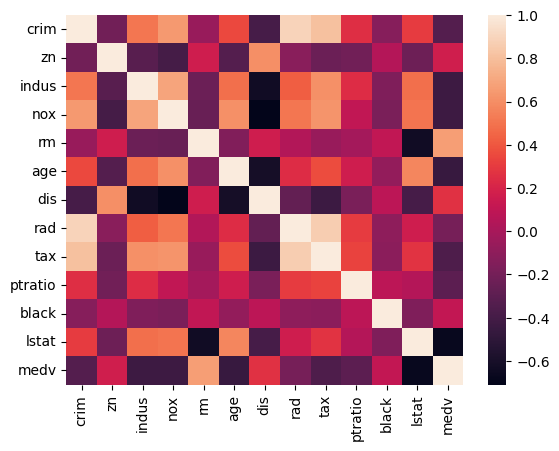

In [125]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.heatmap(df.corr().round(2),annot=False)
plt.show()

In [126]:
x = df[['rm']]
y = df['medv']

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [128]:
x_train.shape

(230, 1)

In [129]:
x_test.shape

(58, 1)

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [131]:
model = LinearRegression()
model.fit(x_train,y_train)
pred1= model.predict(x_train)


In [132]:
from sklearn.metrics import r2_score
r2_score(y_train,pred1)

0.4605718959359738

In [133]:
pred2= model.predict(x_test)
r2_score(y_test,pred2)

0.1752637767714358